/Users/larsnielsen/miniconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


788127
#### Test Result ###
# General Infomation
Threads: 8
Generation Size: 8
Symbol Size: 67108864
# Result information
Amount of results: 1000
Average: 831.074053

#### Test Result ###
# General Infomation
Threads: 8
Generation Size: 16
Symbol Size: 33554432
# Result information
Amount of results: 1000
Average: 1153.75752

#### Test Result ###
# General Infomation
Threads: 8
Generation Size: 32
Symbol Size: 16777216
# Result information
Amount of results: 1000
Average: 1896.272533

#### Test Result ###
# General Infomation
Threads: 8
Generation Size: 64
Symbol Size: 8388608
# Result information
Amount of results: 1000
Average: 3584.454377

#### Test Result ###
# General Infomation
Threads: 8
Generation Size: 256
Symbol Size: 2097152
# Result information
Amount of results: 1000
Average: 11660.694824

#### Test Result ###
# General Infomation
Threads: 8
Generation Size: 256
Symbol Size: 2097152
# Result information
Amount of results: 1000
Average: 11660.694824

True
[831.0740529999999

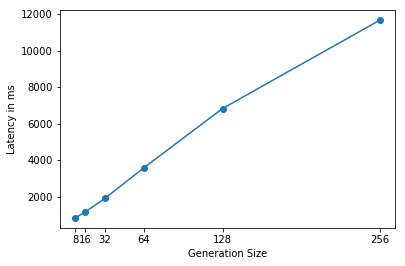

In [1]:
# 8 Threads
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

class Result:
    
    threads = -1
    symbol_size = -1
    symbols = -1
    def __init__(self, arr):
        data = [entry.split(',') for entry in arr]
        self.results = list()
        self.threads = long(data[0][3])
        self.symbols = long(data[0][4])
        self.symbol_size = long(data[0][5])
        self.__get_results(arr)
        
        
    def __get_results(self, arr):
        for entry in arr:
            self.results.append(
            {'start_time': long((entry.split(','))[0]),
             'end_time': long((entry.split(','))[1]),
             'diff': long(entry.split(',')[2])
            })
            
    def average(self,unit=None):
        result = 0
        for entry in self.results:
            result = result + entry.get('diff', 0)
            # print result
        result = float(result) / len(self.results)
        if unit is None:
            return result
        elif unit == 'ms':
            return result / 1000
        
    def maximum(self, unit=None):
        values = [entry.get('diff') for entry in self.results]

        if unit == None:
            return max(values)
        elif unit == 'ms':
            return float(max(values))/1000
    
    def minimum(self, unit=None):
        values = [entry.get('diff') for entry in self.results]
        if unit == None:
            return min(values)
        elif unit == 'ms':
            return float(min(values))/1000  
        
    def diff_look_up(self, diff):
        for entry in self.results:
            if entry.get('diff') == diff:
                return entry
        return None
        
    def result_report(self, unit=None):
        text = '#### Test Result ###'
        text = text + '\n' + '# General Infomation'
        text = text + '\n' + 'Threads: {threads}'.format(threads=self.threads)
        text = text + '\n' + 'Generation Size: {symbols}'.format(symbols=self.symbols)
        text = text + '\n' + 'Symbol Size: {symbol_size}'.format(symbol_size=self.symbol_size)
        text = text + '\n' + '# Result information'
        text = text + '\n' + 'Amount of results: {res}'.format(res=len(self.results))
      #  text = text + '\n' + 'Min: {minn}'.format(minn=self.minimum(unit))
      #  text = text + '\n' + 'Max: {maxz}'.format(maxz=self.maximum(unit))
        text = text + '\n' + 'Average: {avg}'.format(avg=self.average(unit))
        return text

def read_file(file_name):
    with open(file_name) as file:
        content = file.readlines()
    content = [line.strip() for line in content]
    return content

def plot_results(results, file_name):
    
    averages = [res.average(unit='ms') for res in results]
    print(averages)
    generations = [res.symbols for res in results]
    print(generations)
    my_xticks = ['8','16','32','64','128','256']
    pd.DataFrame
    fig = plt.figure()
    print(my_xticks)
    plt.xticks(generations, my_xticks)
    plt.plot(generations, averages, marker='o')
    # plt.yscale("log", nonposy='clip')
    plt.ylabel('Latency in ms')
    plt.xlabel('Generation Size')
    fig.savefig('../results/complex_encoder/{}'.format(file_name))
    plt.show()
    
def are_same_data_size(results):
    for entry in results:
        for res in results:
            ds1 = entry.symbols * entry.symbol_size
            ds2 = res.symbols * res.symbol_size
            if not ds1 == ds2:
                return False
    return True
    
res = Result(read_file('../results/complex_encoder/1525732922_complex_encoder_benchmark_8_8_67108864'))
res1 = Result(read_file('../results/complex_encoder/1525707946_complex_encoder_benchmark_8_16_33554432'))
res2 = Result(read_file('../results/complex_encoder/1525890723_complex_encoder_benchmark_8_32_16777216'))
res3 = Result(read_file('../results/complex_encoder/1525780992_complex_encoder_benchmark_8_64_8388608'))
res4 = Result(read_file('../results/complex_encoder/1525905803_complex_encoder_benchmark_8_128_4194304'))
res5 = Result(read_file('../results/complex_encoder/1525698436_complex_encoder_benchmark_8_256_2097152'))
    
minm = res.results[0].get('diff')
for entry in res.results:
    if entry.get('diff') < minm:
        minm = entry.get('diff')
print(minm)
    

print res.result_report(unit='ms')
print ''

print res1.result_report(unit='ms')
print ''

print res2.result_report(unit='ms')
print ''

print res3.result_report(unit='ms')
print ''

print res5.result_report(unit='ms')
print ''

print res5.result_report(unit='ms')
print ''

results = [res, res1, res2, res3, res4, res5]
print(are_same_data_size(results))
plot_results(results, 'complex_encoder_threads_8_data_size_512.eps')

869535
#### Test Result ###
# General Infomation
Threads: 32
Generation Size: 8
Symbol Size: 67108864
# Result information
Amount of results: 1000
Average: 901.790538

#### Test Result ###
# General Infomation
Threads: 32
Generation Size: 16
Symbol Size: 33554432
# Result information
Amount of results: 1000
Average: 460.189209

#### Test Result ###
# General Infomation
Threads: 32
Generation Size: 32
Symbol Size: 16777216
# Result information
Amount of results: 1000
Average: 2215.725345

#### Test Result ###
# General Infomation
Threads: 32
Generation Size: 64
Symbol Size: 8388608
# Result information
Amount of results: 1000
Average: 3909.08572

#### Test Result ###
# General Infomation
Threads: 32
Generation Size: 256
Symbol Size: 2097152
# Result information
Amount of results: 1000
Average: 14308.138268

#### Test Result ###
# General Infomation
Threads: 32
Generation Size: 256
Symbol Size: 2097152
# Result information
Amount of results: 1000
Average: 14308.138268

True
[700.02236399

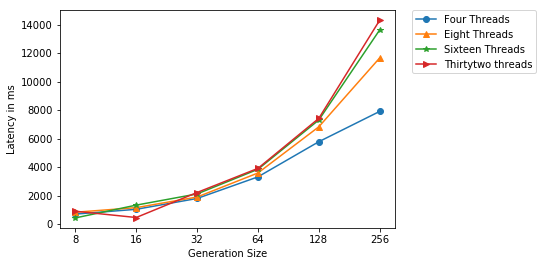

In [8]:
# 8 Threads
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

class Result:
    
    threads = -1
    symbol_size = -1
    symbols = -1
    def __init__(self, arr):
        data = [entry.split(',') for entry in arr]
        self.results = list()
        self.threads = long(data[0][3])
        self.symbols = long(data[0][4])
        self.symbol_size = long(data[0][5])
        self.__get_results(arr)
        
        
    def __get_results(self, arr):
        for entry in arr:
            self.results.append(
            {'start_time': long((entry.split(','))[0]),
             'end_time': long((entry.split(','))[1]),
             'diff': long(entry.split(',')[2])
            })
            
    def average(self,unit=None):
        result = 0
        for entry in self.results:
            result = result + entry.get('diff', 0)
            # print result
        result = float(result) / len(self.results)
        if unit is None:
            return result
        elif unit == 'ms':
            return result / 1000
        
    def maximum(self, unit=None):
        values = [entry.get('diff') for entry in self.results]

        if unit == None:
            return max(values)
        elif unit == 'ms':
            return float(max(values))/1000
    
    def minimum(self, unit=None):
        values = [entry.get('diff') for entry in self.results]
        if unit == None:
            return min(values)
        elif unit == 'ms':
            return float(min(values))/1000  
        
    def diff_look_up(self, diff):
        for entry in self.results:
            if entry.get('diff') == diff:
                return entry
        return None
        
    def result_report(self, unit=None):
        text = '#### Test Result ###'
        text = text + '\n' + '# General Infomation'
        text = text + '\n' + 'Threads: {threads}'.format(threads=self.threads)
        text = text + '\n' + 'Generation Size: {symbols}'.format(symbols=self.symbols)
        text = text + '\n' + 'Symbol Size: {symbol_size}'.format(symbol_size=self.symbol_size)
        text = text + '\n' + '# Result information'
        text = text + '\n' + 'Amount of results: {res}'.format(res=len(self.results))
      #  text = text + '\n' + 'Min: {minn}'.format(minn=self.minimum(unit))
      #  text = text + '\n' + 'Max: {maxz}'.format(maxz=self.maximum(unit))
        text = text + '\n' + 'Average: {avg}'.format(avg=self.average(unit))
        return text

def read_file(file_name):
    with open(file_name) as file:
        content = file.readlines()
    content = [line.strip() for line in content]
    return content

def plot_results(four, eight, sixteen, thirtytwo, file_name):
    
    four_avg = [res.average(unit='ms') for res in four]
    print(four_avg)
    eight_avg = [res.average(unit='ms') for res in eight]
    print(eight_avg)
    sixteen_avg = [res.average(unit='ms') for res in sixteen]
    print(sixteen_avg)
    thirtytwo_avg = [res.average(unit='ms') for res in thirtytwo]
    print(thirtytwo_avg)
    
    generations = [res.symbols for res in four]
    print(generations)
    my_xticks = ['8','16','32','64','128','256']
    pd.DataFrame
    fig = plt.figure()
    print(my_xticks)
    plt.xticks(range(3, 9), my_xticks)
    plt.plot(range(3, 9), four_avg, marker='o', label='Four Threads')
    plt.plot(range(3, 9), eight_avg, marker='^', label='Eight Threads')
    plt.plot(range(3, 9), sixteen_avg, marker='*', label='Sixteen Threads')    
    plt.plot(range(3, 9), thirtytwo_avg, marker='>', label='Thirtytwo threads')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    # plt.yscale("log", nonposy='clip')
    plt.ylabel('Latency in ms')
    plt.xlabel('Generation Size')
    fig.savefig('../results/complex_encoder/{}'.format(file_name))
    plt.show()
    
def are_same_data_size(results):
    for entry in results:
        for res in results:
            ds1 = entry.symbols * entry.symbol_size
            ds2 = res.symbols * res.symbol_size
            if not ds1 == ds2:
                return False
    return True
    

res = Result(read_file('../results/complex_encoder/1525839862_complex_encoder_benchmark_4_8_67108864'))
res1 = Result(read_file('../results/complex_encoder/1525769125_complex_encoder_benchmark_4_16_33554432'))
res2 = Result(read_file('../results/complex_encoder/1525973792_complex_encoder_benchmark_4_32_16777216'))
res3 = Result(read_file('../results/complex_encoder/1525818613_complex_encoder_benchmark_4_64_8388608'))
res4 = Result(read_file('../results/complex_encoder/1525963681_complex_encoder_benchmark_4_128_4194304'))
res5 = Result(read_file('../results/complex_encoder/1525759747_complex_encoder_benchmark_4_256_2097152'))

four_threads = [res, res1, res2, res3, res4, res5]    
    
res = Result(read_file('../results/complex_encoder/1525732922_complex_encoder_benchmark_8_8_67108864'))
res1 = Result(read_file('../results/complex_encoder/1525707946_complex_encoder_benchmark_8_16_33554432'))
res2 = Result(read_file('../results/complex_encoder/1525890723_complex_encoder_benchmark_8_32_16777216'))
res3 = Result(read_file('../results/complex_encoder/1525780992_complex_encoder_benchmark_8_64_8388608'))
res4 = Result(read_file('../results/complex_encoder/1525905803_complex_encoder_benchmark_8_128_4194304'))
res5 = Result(read_file('../results/complex_encoder/1525698436_complex_encoder_benchmark_8_256_2097152'))

eight_threads = [res, res1, res2, res3, res4, res5]
    

res = Result(read_file('../results/complex_encoder/1525880514_complex_encoder_benchmark_16_8_67108864'))
res1 = Result(read_file('../results/complex_encoder/1525849624_complex_encoder_benchmark_16_16_33554432'))
res2 = Result(read_file('../results/complex_encoder/1525807005_complex_encoder_benchmark_16_32_16777216'))
res3 = Result(read_file('../results/complex_encoder/1525830752_complex_encoder_benchmark_16_64_8388608'))
res4 = Result(read_file('../results/complex_encoder/1525796541_complex_encoder_benchmark_16_128_4194304'))
res5 = Result(read_file('../results/complex_encoder/1525871477_complex_encoder_benchmark_16_256_2097152'))

sixteen_threads = [res, res1, res2, res3, res4, res5]

res = Result(read_file('../results/complex_encoder/1525983656_complex_encoder_benchmark_32_8_67108864'))
res1 = Result(read_file('../results/complex_encoder/1525949630_complex_encoder_benchmark_32_16_33554432'))
res2 = Result(read_file('../results/complex_encoder/1525743576_complex_encoder_benchmark_32_32_16777216'))
res3 = Result(read_file('../results/complex_encoder/1525918051_complex_encoder_benchmark_32_64_8388608'))
res4 = Result(read_file('../results/complex_encoder/1525723623_complex_encoder_benchmark_32_128_4194304'))
res5 = Result(read_file('../results/complex_encoder/1525940590_complex_encoder_benchmark_32_256_2097152'))

thirtytwo_threads = [res, res1, res2, res3, res4, res5]

minm = res.results[0].get('diff')
for entry in res.results:
    if entry.get('diff') < minm:
        minm = entry.get('diff')
print(minm)
    

print res.result_report(unit='ms')
print ''

print res1.result_report(unit='ms')
print ''

print res2.result_report(unit='ms')
print ''

print res3.result_report(unit='ms')
print ''

print res5.result_report(unit='ms')
print ''

print res5.result_report(unit='ms')
print ''

results = [res, res1, res2, res3, res4, res5]
print(are_same_data_size(results))
plot_results(four_threads, eight_threads, sixteen_threads, thirtytwo_threads, 'complex_encoder_threads_all_threads_data_size_512.eps')